## 1. Compute -- Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.  Is there a correlation?

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
fyntra = pd.read_csv('C:\\Users\\215518\\Desktop\\FyntraCustomerData.csv')

In [69]:
fyntra.columns

Index(['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

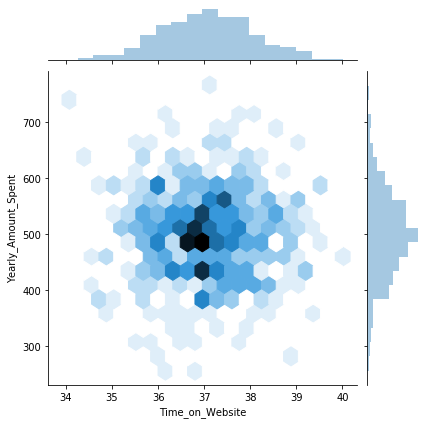

In [70]:
sns.jointplot(x='Time_on_Website', y='Yearly_Amount_Spent', data=fyntra, kind='hex')

## 2. Compute – Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One?

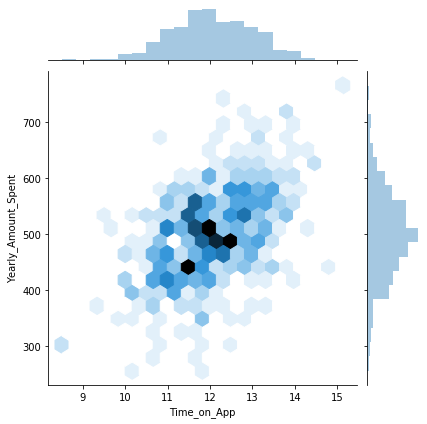

In [71]:
sns.jointplot(x='Time_on_App', y='Yearly_Amount_Spent', data=fyntra, kind='hex')

## 3. Compute -- Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

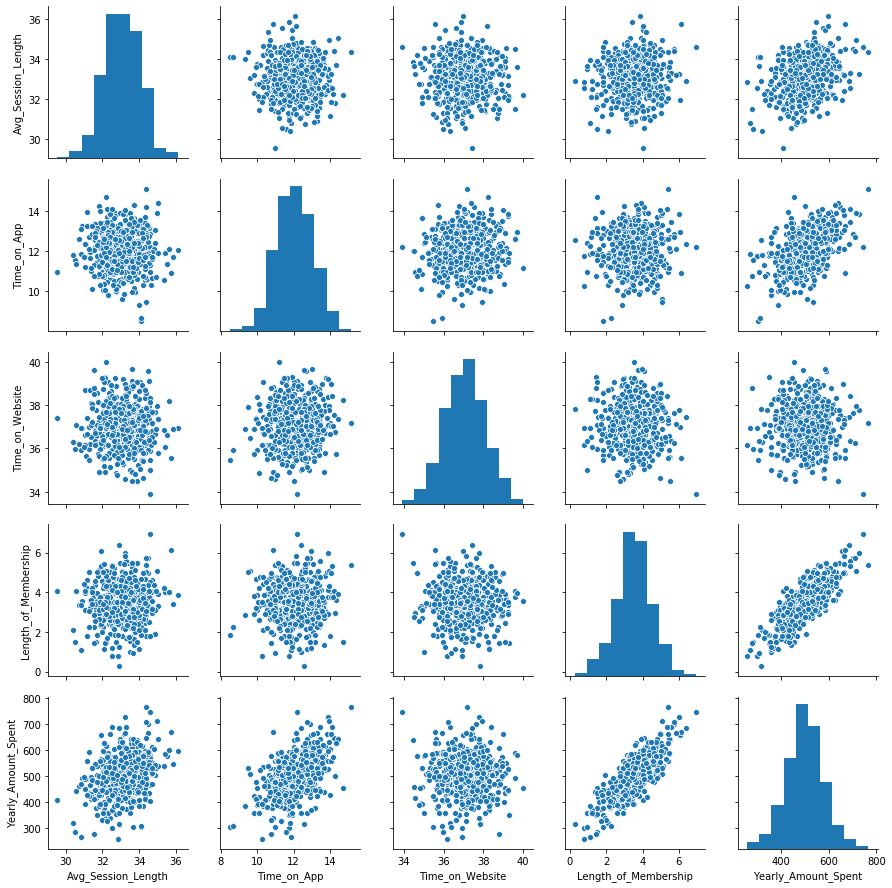

In [72]:
sns.pairplot(fyntra)

## 4. Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

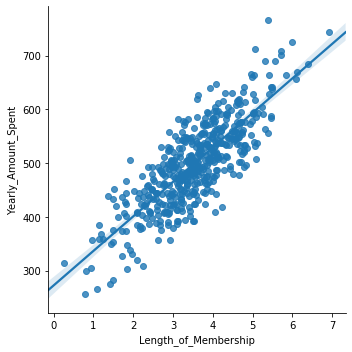

In [73]:
sns.lmplot(x ='Length_of_Membership', y ='Yearly_Amount_Spent', data=fyntra)

## 5. Compute – Train and Test the data and answer multiple questions -- What is the use of random_state=85? 

In [74]:
x = fyntra[['Avg_Session_Length','Time_on_App','Time_on_Website','Length_of_Membership']]
y = fyntra[['Yearly_Amount_Spent']]

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=85)

# random_state=85 splits the test and train datasets with a random manner. In case the random_state is not used in train_test_split, it will give you different values everytime you run the code.

## 6. Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
model = LinearRegression().fit(x_train,y_train)

In [78]:
model.score(x_train,y_train)

0.9856550875864424

In [79]:
pred = model.predict(x_test)

In [80]:
pred

array([[466.86156917],
       [543.10476769],
       [282.79392763],
       [538.27354869],
       [512.40112784],
       [478.66933503],
       [447.75837308],
       [572.31974729],
       [444.236817  ],
       [580.78571482],
       [430.70498852],
       [481.26706377],
       [507.29658508],
       [553.73185194],
       [562.1426496 ],
       [610.31757934],
       [483.79330947],
       [505.16834899],
       [485.33463717],
       [313.5328704 ],
       [471.52782721],
       [493.23004364],
       [472.82987918],
       [402.7446886 ],
       [488.33517985],
       [513.44653356],
       [450.7733692 ],
       [379.7946349 ],
       [423.38292879],
       [576.21767831],
       [370.3095119 ],
       [486.92595664],
       [499.9757797 ],
       [508.13824276],
       [535.84418633],
       [408.14777643],
       [540.39869423],
       [503.52275524],
       [416.65608611],
       [387.36059172],
       [520.83339745],
       [445.75456204],
       [498.75768156],
       [552

Text(0, 0.5, 'predicted values')

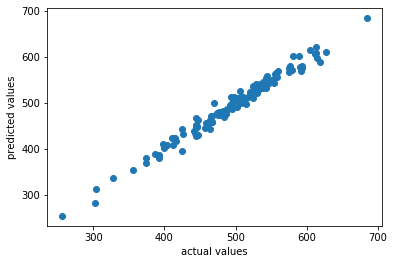

In [81]:
plt.scatter(y_test,pred)
plt.xlabel('actual values')
plt.ylabel('predicted values')

## 7. What is the value of Root Mean Squared Error? 

In [82]:
from sklearn import metrics
print('Root Mean Squared Error : ', metrics.mean_squared_error (y_test,pred))

Root Mean Squared Error :  106.50493151539868


## 8. Final Question – Based on coefficients interpret company should focus more on their mobile app or on their website 

In [83]:
print(model.coef_)

[[25.8900575  39.10639479  0.51713276 61.36373131]]


In [84]:
print(model.intercept_)

[-1063.97741835]


In [85]:
coefdataframe = pd.DataFrame(model.coef_.transpose(), x.columns, columns=['coeff'])
coefdataframe

,coeff
Avg_Session_Length,25.890057
Time_on_App,39.106395
Time_on_Website,0.517133
Length_of_Membership,61.363731


## company should focus on their website more as against mobile app